<a href="https://colab.research.google.com/github/nika-va/practice/blob/main/05_transfer_learning_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!nvidia-smi

Thu Sep 28 09:11:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    28W /  70W |   1829MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [44]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-28 09:11:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-28 09:11:39 (80.4 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [45]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [46]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data('10_food_classes_10_percent.zip')

--2023-09-28 09:11:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.207, 108.177.121.207, 142.250.1.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.3’

10_food_classes_10_ 100%[===================>] 160.74M   291MB/s    in 0.6s    

2023-09-28 09:11:40 (291 MB/s) - ‘10_food_classes_10_percent.zip.3’ saved [168546183/168546183]



In [47]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [48]:
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [49]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [50]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [51]:
# for images, labels in train_data_10_percent.take(1):
#   print(images, labels)

In [52]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_data_10_percent, epochs=10, steps_per_epoch=(len(train_data_10_percent)))

Epoch 1/10
24/24 [==============================] - 17s 59ms/step - loss: 1.8806 - accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 2s 58ms/step - loss: 1.0899 - accuracy: 0.7813
Epoch 3/10
24/24 [==============================] - 2s 59ms/step - loss: 0.7835 - accuracy: 0.8347
Epoch 4/10
24/24 [==============================] - 2s 69ms/step - loss: 0.6378 - accuracy: 0.8707
Epoch 5/10
24/24 [==============================] - 2s 73ms/step - loss: 0.5400 - accuracy: 0.8853
Epoch 6/10
24/24 [==============================] - 2s 58ms/step - loss: 0.4709 - accuracy: 0.8960
Epoch 7/10
24/24 [==============================] - 2s 60ms/step - loss: 0.4193 - accuracy: 0.9053
Epoch 8/10
24/24 [==============================] - 2s 60ms/step - loss: 0.3765 - accuracy: 0.9227
Epoch 9/10
24/24 [==============================] - 2s 58ms/step - loss: 0.3415 - accuracy: 0.9320
Epoch 10/10
24/24 [==============================] - 2s 62ms/step - loss: 0.3123 - accuracy: 0.9400


In [53]:
len(train_data_10_percent)

24

In [54]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name='input_layer')
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = base_model(inputs)
print(f"shape after passing inputs through base modl: {x.shape}")
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"shape after GlobalAveragePooling2D: {x.shape}")
outputs = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)
model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics='accuracy')
history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        validation_data=test_data,
                        validation_steps=int(0.25 * len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning",
                                                               "10_percent_feature_extraction")])

shape after passing inputs through base modl: (None, 7, 7, 1280)
shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230928-091226
Epoch 1/5
24/24 [==============================] - 13s 266ms/step - loss: 1.8873 - accuracy: 0.4147 - val_loss: 1.3294 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 5s 178ms/step - loss: 1.0917 - accuracy: 0.7720 - val_loss: 0.8843 - val_accuracy: 0.8158
Epoch 3/5
24/24 [==============================] - 5s 179ms/step - loss: 0.7764 - accuracy: 0.8427 - val_loss: 0.7222 - val_accuracy: 0.8289
Epoch 4/5
24/24 [==============================] - 5s 178ms/step - loss: 0.6447 - accuracy: 0.8547 - val_loss: 0.6487 - val_accuracy: 0.8487
Epoch 5/5
24/24 [==============================] - 5s 179ms/step - loss: 0.5445 - accuracy: 0.8907 - val_loss: 0.5952 - val_accuracy: 0.8470


In [55]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.5620 - accuracy: 0.8604


[0.5620165467262268, 0.8604000210762024]

In [56]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_14
1 rescaling_11
2 normalization_8
3 rescaling_12
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activ

In [57]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_11 (Rescaling)    (None, None, None, 3)        0         ['input_14[0][0]']            
                                                                                                  
 normalization_8 (Normaliza  (None, None, None, 3)        7         ['rescaling_11[0][0]']        
 tion)                                                                                            
                                                                                                  
 rescaling_12 (Rescaling)    (None, None, None, 3)        0         ['normalization_8

In [58]:
model_0.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

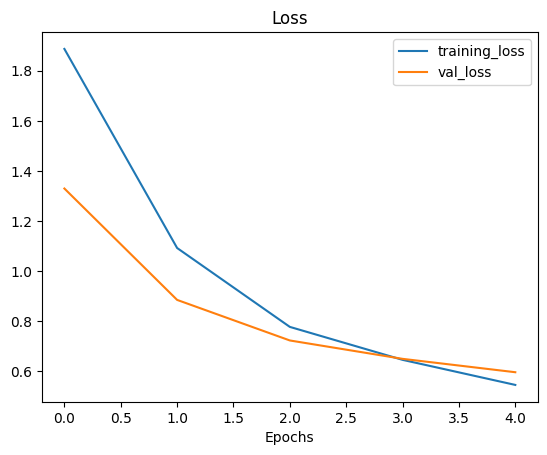

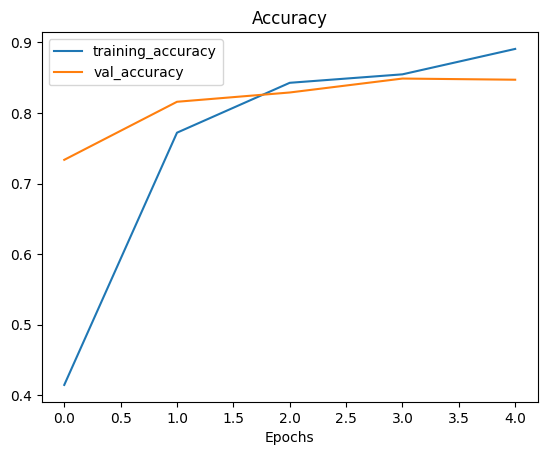

In [59]:
plot_loss_curves(history_0)